<a href="https://colab.research.google.com/github/andreaeusebi/pytorch_for_deep_learning/blob/main/notebooks/03_pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

## Input and output shapes:

NHWC : [batch_size, height, width, color_channel]  --> many libraries use this representation

NCHW : [batch_size, color_channel, height, width] --> this is the default image representation in PyTorch

## Common Libraries

In [1]:
# Import PyTorch
import torch
from torch import nn

from torch.utils.data import DataLoader

print(f"torch version: {torch.__version__}")

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

print(f"torchvision version: {torchvision.__version__}")

# Import matoplot lib
import matplotlib.pyplot as plt

torch version: 2.1.0+cu121
torchvision version: 0.16.0+cu121


## Set up device agnostic code

In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Running on device: {DEVICE}")

Running on device: cpu


## 1. Getting a Dataset

In [3]:
train_data = datasets.FashionMNIST(root="data",
                                   train=True,
                                   download=True,
                                   transform=ToTensor(),
                                   target_transform=None)

test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)

100%|██████████| 26421880/26421880 [00:01<00:00, 15050519.10it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 255915.20it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5017087.35it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 3909519.64it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
def printTensorInfo(x_ : torch.Tensor, name_ : str):
  print(f"--- {name_} Info:")
  print(f"--- Shape: {x_.shape}")
  print(f"--- Dtype: {x_.dtype}")
  print(f"--- Device: {x_.device}")
  print(f"------------------------")

print(type(train_data))
print(type(train_data[0]))
print(type(train_data[0][0]))
print(type(train_data[0][1]))

print(type(train_data.__getitem__(0)))

printTensorInfo(train_data[0][0], "train_data[0][0]")

<class 'torchvision.datasets.mnist.FashionMNIST'>
<class 'tuple'>
<class 'torch.Tensor'>
<class 'int'>
<class 'tuple'>
--- train_data[0][0] Info:
--- Shape: torch.Size([1, 28, 28])
--- Dtype: torch.float32
--- Device: cpu
------------------------


In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets


tensor([9, 0, 0,  ..., 3, 0, 5])

### Visualizer our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

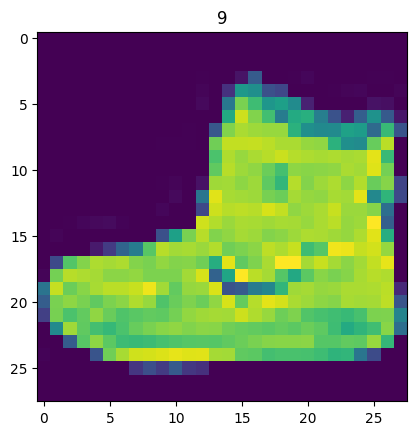

In [9]:
image, label = train_data[0]

print(f"Image shape: {image.shape}")

plt.imshow(image.squeeze())
plt.title(label)

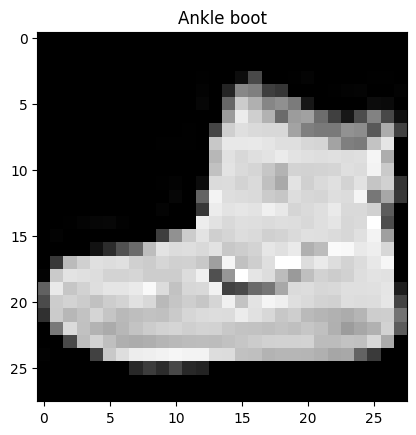

In [10]:
plt.imshow(image.squeeze(), cmap="gray");
plt.title(class_names[label]);

## 2. Prepare DataLoader

In [11]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [12]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

We want to turn our data into batches (or mini-batches)

In [13]:
BATCH_SIZE = 32

# Turn datasets into Python Iterable
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

In [14]:
print(type(train_dataloader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [15]:
print(f"train_dataloader: {train_dataloader}")

train_dataloader: <torch.utils.data.dataloader.DataLoader object at 0x794b01d1f6a0>


In [16]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
test_features_batch, test_labels_batch = next(iter(test_dataloader))

print(f"train_features_batch type: {type(train_features_batch)}")
print(f"train_features_batch shape: {train_features_batch.shape}")

print(f"train_labels_batch type: {type(train_labels_batch)}")
print(f"train_labels_batch shape: {train_labels_batch.shape}")

train_features_batch type: <class 'torch.Tensor'>
train_features_batch shape: torch.Size([32, 1, 28, 28])
train_labels_batch type: <class 'torch.Tensor'>
train_labels_batch shape: torch.Size([32])


len(train_features_batch): 32
random_idx: 6


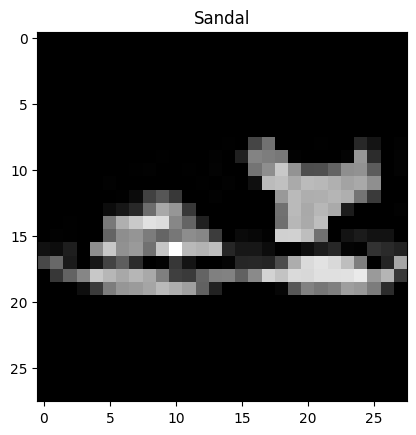

In [17]:
# Show a sample
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

print(f"len(train_features_batch): {len(train_features_batch)}")

random_idx = torch.randint(0, len(train_features_batch), (1,)).item()

print(f"random_idx: {random_idx}")

random_img, random_label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(random_img.squeeze(), cmap="gray");
plt.title(class_names[random_label]);

## 3. Model 0: Build a baseline model

In [18]:
# Create a flatten layer

flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
print(x.shape)

# flatten the sample
output = flatten_model(x)  # perform forward pass using flatten layer

print(output.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


We have flatted the 2D image to a 1D vector --> since we want to create a simple model with just a linear layer, and linear layer can't handle multidimensional inputs

In [19]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flat the input to 1D vector -> has no learnable parameters
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [20]:
torch.manual_seed(RANDOM_SEED)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)

model_0.to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x).shape

torch.Size([1, 10])

### Setup loss and optimizer

In [22]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [23]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### Creating a training loop and training a model on batches of data

In [25]:
from tqdm.auto import tqdm

torch.manual_seed(RANDOM_SEED)

train_time_start_on_cpu = timer()

epochs = 3

# loop over epochs
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")

  train_loss = 0

  # loop over batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(X)

    loss = loss_fn(y_pred, y)

    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step() # update model parameters once per batch instead of once per epoch

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)

  ### Testing
  # Setup variables for accumulatively adding up loss and accuracy
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
      for X, y in test_dataloader:
          # 1. Forward pass
          test_pred = model_0(X)

          # 2. Calculate loss (accumatively)
          test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

          # 3. Calculate accuracy (preds need to be same as y_true)
          test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

      # Calculations on test metrics need to happen inside torch.inference_mode()
      # Divide total test loss by length of test dataloader (per batch)
      test_loss /= len(test_dataloader)

      # Divide total accuracy by length of test dataloader (per batch)
      test_acc /= len(test_dataloader)

  ## Print out what's happening
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 39.368 seconds


In [26]:
print( next(model_0.parameters()).device )

cpu


## 4. Make predictions and get Model 0 results

In [27]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = DEVICE):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [28]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn, device="cpu"
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [29]:
model_0.to(DEVICE)

# print(f"model_0 is on device: {next(iter(model_0.state_dict()))}")
# print("------------------------------")
print(f"model_0 is on device: {model_0.state_dict()[next(iter(model_0.state_dict()))].device}")
print("------------------------------")
# print(f"model_0 is on device: {model_0.state_dict()}")
# print("------------------------------")

model_0 is on device: cpu
------------------------------


## 6. Model 1: Building a better model with non-linearity

In [30]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [31]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
                              hidden_units=10,
                              output_shape=len(class_names) # number of output classes desired
).to(DEVICE) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cpu')

In [32]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### Functionizing training and test loops

In [33]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = DEVICE):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = DEVICE):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [34]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=DEVICE)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cpu: 44.122 seconds


In [35]:
torch.manual_seed(42)

# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=DEVICE
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [36]:
print("model 0 results:")
print(model_0_results)

model 0 results:
{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.47663894295692444, 'model_acc': 83.42651757188499}


## 7. Model 2: Building a Convolutional Neural Network (CNN)

In [70]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape,
               hidden_units,
               output_shape):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        # Create a conv layer
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculate this
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")

    return x


In [71]:
torch.manual_seed(RANDOM_SEED)

model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names))

model_2.to(DEVICE)

print(f"model_2 is on device: {next(model_2.parameters()).device}")

model_2 is on device: cpu


### Trick to find out the size of the final layer

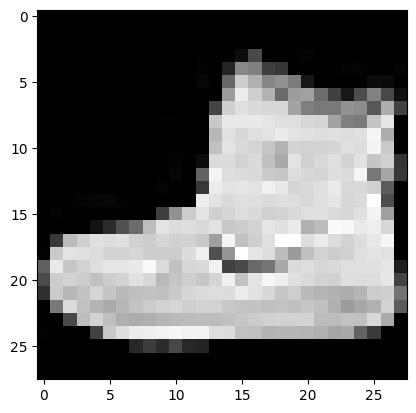

In [72]:
plt.imshow(image.squeeze(), cmap="gray");

In [73]:
# Pass image through the model
model_2.eval()
with torch.inference_mode():
  model_2(image.unsqueeze(dim=0).to(DEVICE))

We got error but also the printings we added in the forward method.

From the error we can retrieve the shape of the tensor when plugged into the linear layer.

### Setup a loss function and optimizer for model_2

In [74]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

### Training and testing model_2 using our training and test functions

In [75]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=DEVICE
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=DEVICE
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=DEVICE)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59518 | Train accuracy: 78.38%
Test loss: 0.39500 | Test accuracy: 85.99%

Epoch: 1
---------
Train loss: 0.36536 | Train accuracy: 86.90%
Test loss: 0.35244 | Test accuracy: 86.91%

Epoch: 2
---------
Train loss: 0.32588 | Train accuracy: 88.13%
Test loss: 0.32719 | Test accuracy: 88.07%

Train time on cpu: 169.103 seconds


In [76]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [77]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [78]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}